# U3L3.4
## Challenge -
Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:
1. Vanilla logistic regression
2. Ridge logistic regression
3. Lasso logistic regression

 for classification

If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value.

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

### We would like to predict if the city will be classified as a murder one or safe!

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [3]:
link = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'

indices_to_skip = np.array([0,1,2,353,354,355])

df = pd.read_csv(link,skiprows=indices_to_skip , header=1)

df.tail()


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
343,Woodbury Town,"10,685",3,0,nan,0,2,1,541,9,529,3,nan
344,Woodridge Village,829,7,0,nan,0,0,7,17,8,9,0,0.000
345,Woodstock Town,"5,931",2,0,nan,0,0,2,58,13,45,0,nan
346,Yonkers,"199,134","1,036",6,nan,25,390,615,"2,368",470,"1,662",236,10.000
347,Yorktown Town,"36,643",15,0,nan,0,2,13,334,45,287,2,nan


In [4]:
df.shape

(348, 13)

In [5]:
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

In [6]:
# Not working:
new_cols = ['Murder','Rubberry']
def insert_cols(df):
    for i in range(len(new_cols)):
        #df[new_cols[i]]==np.nan
        return new_cols[i]
    
insert_cols(df)

'Murder'

### Replace ',' before converting to numeric:

In [7]:
cols = df.columns.drop(['City','Murder and\nnonnegligent\nmanslaughter','Rape\n(revised\ndefinition)1'])

# Replace ',' before converting to numeric:
df[cols]=df[cols].replace(',*','',regex=True)

# Convert to numeric
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
City                                    348 non-null object
Population                              348 non-null int64
Violent
crime                           348 non-null int64
Murder and
nonnegligent
manslaughter    348 non-null int64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               348 non-null int64
Robbery                                 348 non-null int64
Aggravated
assault                      348 non-null int64
Property
crime                          348 non-null int64
Burglary                                348 non-null int64
Larceny-
theft                          348 non-null int64
Motor
vehicle
theft                     348 non-null int64
Arson3                                  187 non-null float64
dtypes: float64(2), int64(10), object(1)
memory usage: 35.4+ KB


In [9]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


### >>> std in `Population` is huge, this is an outlier that kills the analysis!

Drop values in "Population" that are outliers (more than 3 stdev from the mean):

In [10]:
q = df["Population"].quantile(0.99)
df2=df[df["Population"] < q].sort_values('Population', ascending=False)

In [11]:
df2.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,344.000,344.000,344.000,0.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,185.000
mean,14152.573,33.078,0.334,nan,1.939,10.378,20.427,316.703,53.863,253.366,9.474,1.124
std,18876.821,105.876,1.560,nan,5.662,36.304,64.049,602.881,134.721,454.847,28.851,4.758
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2983.250,2.000,0.000,nan,0.000,0.000,1.000,39.000,6.000,31.000,0.000,0.000
50%,7106.000,6.000,0.000,nan,0.000,1.000,4.000,111.500,17.000,93.500,2.000,0.000
75%,17889.250,21.000,0.000,nan,2.000,5.000,13.250,334.750,50.000,275.500,7.000,1.000
max,143834.000,1192.000,21.000,nan,75.000,400.000,696.000,6473.000,1781.000,4298.000,394.000,57.000


In [12]:
# Create a new column from `Robbery` that has binary data based on condition:
#df2['Robbery2'] = np.where(df2['Robbery']>5, 1, 0)

# Check to make sure it worked.
#print(df2['Robbery'].groupby(df2['Robbery2']).describe())

In [13]:
df2.loc[df['Murder and\nnonnegligent\nmanslaughter']>0,'Murder']=1
df2.loc[df['Murder and\nnonnegligent\nmanslaughter']==0,'Murder']=0

In [14]:
df2.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Murder'],
      dtype='object')

In [15]:
df2=df2.drop(['City',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1'],axis=1)

In [16]:
df2.dtypes

Population                       int64
Violent\ncrime                   int64
Rape\n(legacy\ndefinition)2      int64
Robbery                          int64
Aggravated\nassault              int64
Property\ncrime                  int64
Burglary                         int64
Larceny-\ntheft                  int64
Motor\nvehicle\ntheft            int64
Arson3                         float64
Murder                         float64
dtype: object

In [17]:
# Fill 'na' with zeros:
df2['Arson3']=df2['Arson3'].fillna(0)

In [30]:
df2

,Population,Violent crime,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder
0,143834,1192,75,400,696,6473,1781,4298,394,57.000,1.000
1,118296,107,7,31,68,2118,204,1882,32,3.000,1.000
2,97956,791,30,227,526,4090,705,3243,142,0.000,1.000
3,96667,151,9,60,82,2303,332,1925,46,0.000,0.000
4,87204,57,5,9,41,567,88,466,13,0.000,1.000
5,80705,65,8,17,40,1515,99,1388,28,0.000,0.000
6,78800,175,5,81,89,1391,150,1172,69,0.000,0.000
7,78361,158,11,48,99,2689,345,2271,73,2.000,0.000
8,78215,63,0,31,32,1990,186,1753,51,10.000,0.000
9,68071,554,7,228,317,1436,317,972,147,0.000,1.000


After cleaning the initial data frame I create a new one that will be used as the base model.

In [31]:
murder_base = df2

# We would like to predict if the city will be classified as a murder one or safe!

In [19]:
murder_df = df2

### There are a few big outliers !
We need feature transformation: drop outliers, apply log, cube etc

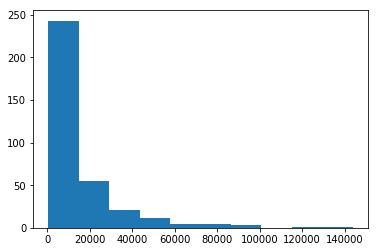

In [20]:
plt.hist(murder_df['Population'],bins=10)
plt.show()

In [21]:
# Who are the biggest towns ?
murder_df.sort_values('Population', ascending=False).head(5)

,Population,Violent crime,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder
310,143834,1192,75,400,696,6473,1781,4298,394,57.000,1.000
7,118296,107,7,31,68,2118,204,1882,32,3.000,1.000
3,97956,791,30,227,526,4090,705,3243,142,0.000,1.000
126,96667,151,9,60,82,2303,332,1925,46,0.000,0.000
267,87204,57,5,9,41,567,88,466,13,0.000,1.000


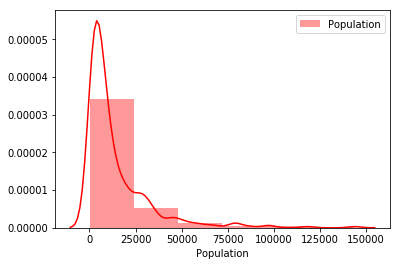

In [22]:
import seaborn as sns

sns.distplot( murder_df["Population"] , color="red", label="Population",bins=6)
plt.legend()
plt.show()

In [23]:
# Reset index b/c some rows are missing after processing the dataframe and 'concatenate' will not be done properly!
murder_df.reset_index(drop=True, inplace=True)

In [24]:
# Standardize each column:
from sklearn import preprocessing

names = murder_df.drop(['Murder'],axis=1).columns
# murder_df_scaled = pd.DataFrame(preprocessing.scale(murder_df.drop(['Murder'],axis=1)), columns=names)
murder_df_scaled = pd.DataFrame(preprocessing.scale(murder_df.loc[:, ~(murder_df.columns).isin(['Murder'])]), columns=names)

In [25]:
murder_df_scaled.head()

,Population,Violent crime,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,6.880,10.962,12.922,10.748,10.563,10.226,12.839,8.905,13.348,15.999
1,5.525,0.699,0.895,0.569,0.744,2.992,1.116,3.586,0.782,0.680
2,4.446,7.169,4.963,5.976,7.905,6.268,4.840,6.582,4.600,-0.172
3,4.378,1.115,1.249,1.369,0.963,3.299,2.068,3.681,1.268,-0.172
4,3.876,0.226,0.541,-0.038,0.322,0.416,0.254,0.468,0.122,-0.172


Concatenate the scaled dataframe with the target column 'Murder':

In [26]:
murder_df_scaled = pd.concat((murder_df_scaled , murder_df['Murder']),axis=1)

In [27]:
# murder_df['Murder'].sort_index().head(37)

# Are there any 'nan' left?
murder_df[murder_df.isnull().any(axis=1)]

,Population,Violent crime,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder


## Fitting a binary logistic model using SKLearn

In [329]:
# Declare a logistic regression classifier.
from sklearn.linear_model import LogisticRegression

lr_simple = LogisticRegression(  ) # C = 1e100 = I'm using this C to compensate for the default penalty parameter ='L2'!
lr1_lasso = LogisticRegression( penalty='l1' )
lr2_ridge = LogisticRegression( penalty='l2' )

y = murder_df_scaled['Murder']
X = murder_df_scaled.drop(['Murder'] , axis = 1)

In [83]:
1e10

10000000000.0

In [275]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(275, 10) (275,)
(69, 10) (69,)


In [276]:
# Fit the model.
lr_simple.fit( X_train, y_train )
# I'm using this C to compensate for the default penalty parameter ='L2'!

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [277]:
# Display Coefficients:
print('Coefficients')
print(lr_simple.coef_)
print(lr_simple.intercept_)


Coefficients
[[ 0.46  0.6   0.65  0.01  0.53  0.01  0.92 -0.21 -0.72  0.47]]
[-2.]


In [278]:
# Predicting the test set results:
pred_y_sklearn = lr_simple.predict( X_test )
pred_y_sklearn

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [279]:
# compare some of our predicted values with the actual values and see how accurate we were:
df_compare=pd.DataFrame({'Actual':y_test, 'Predicted':pred_y_sklearn})  
df_compare

,Actual,Predicted
63,1.000,0.000
177,0.000,0.000
121,0.000,0.000
47,0.000,0.000
210,0.000,0.000
226,0.000,0.000
267,0.000,0.000
232,0.000,0.000
196,0.000,0.000
13,1.000,0.000


### Confusion Matrix

In [280]:
print('\n Accuracy by admission status(Confusion matrix):\n')
print(pd.crosstab( y_test , pred_y_sklearn , rownames=['Actual'], colnames=['Predicted'], margins=True))

print('\nAccuracy of logistic regression classifier on test set: {:.2f}'.format(lr_simple.score(X_test, y_test)))


 Accuracy by admission status(Confusion matrix):

Predicted  0.0  1.0  All
Actual                  
0.0         61    1   62
1.0          5    2    7
All         66    3   69

Accuracy of logistic regression classifier on test set: 0.91


Thus in binary classification C_{i,j}, the count of 
- true negatives is C_{0,0}  --> (it was predicted 0 (j) and discovered to be 0 (i)), 
- false negatives is C_{1,0} --> (it was predicted 0 (j) and discovered to be 1 (i)),
- true positives is C_{1,1}  --> (it was predicted 1 (j) and discovered to be 1 (i)), 
- false positives is C_{0,1} --> (it was predicted 1 (j) and discovered to be 0 (i)),
    
    
      |0   1| <--predicted
    0 |tn fp|
    1 |fn tp|
    ^
    |
    actual

In [281]:
from sklearn.metrics import confusion_matrix

print('\n Accuracy by admission status(Confusion matrix)')
confusion_matrix = confusion_matrix(y_test, pred_y_sklearn)
print(confusion_matrix)



 Accuracy by admission status(Confusion matrix)
[[61  1]
 [ 5  2]]


In [68]:
# Here, the results are different, why?
#import pandas as pd
#y_true = pd.Series(y_test)
#y_pred = pd.Series(pred_y_sklearn)
#
#pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

### Predicting the test set results and calculating the accuracy

In [282]:

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_simple.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


### Cross Validation

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model.

In [283]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

import time
start_time = time.time()

kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

results = cross_val_score( lr_simple , X_train, y_train , cv=kfold)
print(results)

print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

print("\n--- %s seconds ---" % (time.time() - start_time))

[0.86 0.89 0.96 0.86 0.79 0.93 0.93 0.85 0.85 0.93]
10-fold cross validation average accuracy: 0.884

--- 0.03125452995300293 seconds ---


![title](cross_validation_graph.png)
In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

![title](kfold_cross_validation.png)



## Compute precision, recall, F-measure and support

The precision is the ratio 
      tp 
    ---------
    (tp + fp) 
where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio 
      tp 
    ---------
    (tp + fn) 
where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [284]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y_sklearn))

             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95        62
        1.0       0.67      0.29      0.40         7

avg / total       0.90      0.91      0.90        69



### Hyperparameter Tuning:

While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set by the data scientist before training.

Hyperparameter tuning relies more on experimental results than theory, and thus the best method to determine the optimal settings is to try many different combinations evaluate the performance of each model. 

However, evaluating each model only on the training set can lead to one of the most fundamental problems in machine learning: <b>overfitting<b/>.
    
     the standard procedure for hyperparameter optimization accounts for overfitting through cross validation.

In [285]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(lr_simple.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


### Get the best hyperparameter values

In [348]:
from sklearn.model_selection import GridSearchCV
import time
start_time = time.time()

param_grid = {
               'C': [0.1, 0.5, 1, 5, 10, 50, 100,1e3,1e5,1e10]   
                # Create regularization penalty space
                ,'penalty': ['l1', 'l2']
              }

param_clasf = GridSearchCV( lr_simple
                           , param_grid
                           , cv=5,
                       scoring='accuracy')
param_clasf.fit(X_train, y_train)
print(param_clasf.best_params_)


print("\n--- %s seconds ---" % (time.time() - start_time))

{'penalty': 'l1', 'C': 1000.0}

--- 2.953199863433838 seconds ---


### Since the written code is big and not easy to follow I made o copy of this notebook and ran the logistic classifier with the specified parameters.
I discovered that the results were perfect, the model predicted everything. The results were the same as the first run of the logistic model that have C=1e10 and default penalty (l2).

I also discovered that if I run the GridSearchCV a couple more times, the penalty changes from l1 to l2 but 'C' remains 1000.

## Feature Extraction: SelectKbest

SelectKBest selects the top $k$ features that have maximum relevance with the target variable (they explain most of the variance). 

In [286]:
from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.feature_selection import f_regression 

f_classif: ANOVA F-value between label/feature for classification tasks.

chi2 : is also good for classification tasks.

In [287]:
# feature extraction
lr_kbest = SelectKBest(score_func=f_classif, k=5)

#Fitting finds the internal parameters of a model that will be used to transform data. 
# To center the data (make it have zero mean and unit standard error)
# , you subtract the mean and then divide the result by the standard deviation.
fitted = lr_kbest.fit(X_train, y_train)
fitted

SelectKBest(k=5, score_func=<function f_classif at 0x000001DF489AA9D8>)

In [288]:
#Transforming applies the parameters to data. You may fit a model to one set of data, and then 
#transform it on a completely different set.
features = fitted.transform(X_test)
print('2 examples: ',features[:2])
print('number of examples:',len(features))

2 examples:  [[-0.1  -0.17 -0.18 -0.08 -0.18]
 [-0.28 -0.34 -0.29 -0.37 -0.31]]
number of examples: 69


In [289]:
# summarize scores
np.set_printoptions(precision=2)
print(fitted.scores_[:100])

[ 82.24 104.52 112.66  96.93  97.71 104.8  116.69  94.44  83.09  22.83]


In [290]:
lr_kbest.get_support()
np.array(X.columns)[lr_kbest.get_support()]

array(['Violent\ncrime', 'Rape\n(legacy\ndefinition)2',
       'Aggravated\nassault', 'Property\ncrime', 'Burglary'], dtype=object)

In [233]:
# var2:
#X_train_lr = lr_kbest.fit_transform(X_train, y_train)
#X_test_lr = lr_kbest.transform(X_test)
#
#selected_feature_names = [names[i] for i in lr_kbest.get_support(indices=True)]
#selected_feature_names

In [291]:
selected_feature_names = [names[i] for i in lr_kbest.get_support(indices=True)]
selected_feature_names

feat_names = []
feat_scores = []
feat_pval = []

for n in range(0, len(selected_feature_names)):
    #lr_kbest = SelectKBest(score_func=f_classif, k=10)
    #fitted = lr_kbest.fit(X_train, y_train)    
    #print(" %s : %.2f"  % (selected_feature_names[n],fitted.scores_[n]))
    
    feat_names.append(selected_feature_names[n])
    feat_scores.append(fitted.scores_[n])
    feat_pval.append(fitted.pvalues_[n])

# Create a data frame for a better way of visualization:    
feature_scoring = pd.DataFrame({
        'feature': feat_names,
        'score': feat_scores,
        'p_value':feat_pval
    })
# scores are better if greater, p-values are better if smaller (and losses are better if smaller)
feature_scoring.sort_values('score' , ascending = False).reset_index()

,index,feature,p_value,score
0,2,Aggravated\nassault,0.000,112.661
1,1,Rape\n(legacy\ndefinition)2,0.000,104.517
2,4,Burglary,0.000,97.707
3,3,Property\ncrime,0.000,96.927
4,0,Violent\ncrime,0.000,82.237


SelectKBest <u>defaults</u> to scoring parameters using the ANOVA F-value which is a measure of variation between sample means. 

It describes how much of the variance between labels is explained by a particular feature. A higher value therefore means that there is more variation in that feature between person of interests and non persons of interest.

### Evaluate the model with selectKbest features:

In [299]:
X_train[feat_names].reset_index(drop=True).head()

,Violent crime,Rape (legacy definition)2,Aggravated assault,Property crime,Burglary
0,-0.266,-0.343,-0.257,-0.267,-0.207
1,-0.171,-0.343,-0.116,0.029,-0.066
2,-0.180,-0.166,-0.116,0.052,-0.133
3,-0.228,-0.166,-0.226,-0.196,-0.110
4,-0.285,-0.343,-0.288,-0.068,-0.192


In [297]:
# Fit the model.
lr_simple.fit( X_train[feat_names], y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [298]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_simple.score(X_test[feat_names], y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [300]:

import time
start_time = time.time()

results_kbest = cross_val_score( lr_simple , X_train[feat_names] , y_train , cv=kfold)
print(results_kbest)

print("10-fold cross validation average accuracy for SelectKBest: %.3f" % (results_kbest.mean()))

print("\n--- %s seconds ---" % (time.time() - start_time))

[0.89 0.93 0.96 0.86 0.75 0.93 0.93 0.85 0.85 0.93]
10-fold cross validation average accuracy for SelectKBest: 0.887

--- 0.015626907348632812 seconds ---


The score is the same as with the whole columns.

Cross validation gives also a consistent value across the 10 folds.

### Try PCA
PCA is a complexity-reduction technique that tries to reduce a set of variables down to a smaller set of components that represent most of the information in the variables. At a conceptual level, PCA works by identifying sets of variables that share variance, and creating a component to represent that variance.

In [317]:
from sklearn.preprocessing import StandardScaler  

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X_pca = StandardScaler().fit_transform(X)

In [316]:
sklearn_pca = PCA(n_components = len(X.columns) )
Y_sklearn = sklearn_pca.fit_transform(X_pca)

np.set_printoptions(precision=2)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [8.42e-01 7.16e-02 4.13e-02 2.24e-02 1.09e-02 6.39e-03 3.44e-03 1.91e-03
 2.55e-06 1.53e-33]


In [319]:
# What are the numbers of the eigenvalues?
pca = PCA()
eigenvalues = sklearn_pca.explained_variance_
eigenvalues

array([8.45e+00, 7.18e-01, 4.14e-01, 2.24e-01, 1.09e-01, 6.41e-02,
       3.45e-02, 1.91e-02, 2.56e-05, 1.53e-32])

Upon visual inspection, the analyst will keep all the components whose eigenvalue falls above the point where the slope of the line changes the most drastically, also called the "elbow":

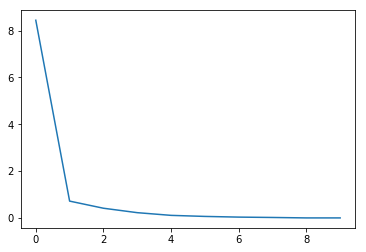

In [320]:
plt.plot(eigenvalues)
plt.show()

### Evaluate the model with PCA top 1 feature

In [324]:
X_pca_1 = pd.DataFrame(data = Y_sklearn[:,0:1]
             , columns = ['ppal_comp_1'])
X_pca_1.head()

,ppal_comp_1
0,35.686
1,5.401
2,16.982
3,6.059
4,1.776


In [325]:
# Take the y_train and reset index before concatenation:
y_pca=y.reset_index(drop=True)

In [ ]:
#principalDf = pd.concat((X_train_pca , y_train_pca),axis=1)

In [326]:
# Fit the model.
lr_simple.fit( X_pca_1, y_pca )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [327]:
print('Accuracy of logistic regression classifier with PCA on test set: {:.2f}'.format(lr_simple.score(X_pca_1, y_pca)))

Accuracy of logistic regression classifier with PCA on test set: 0.89


In [349]:

import time
start_time = time.time()

results_pca_cv = cross_val_score( lr_simple , X_pca_1 , y_pca , cv=kfold)
print(results_pca_cv)

print("10-fold cross validation average accuracy for SelectKBest: %.3f" % (results_pca_cv.mean()))

print("\n--- %s seconds ---" % (time.time() - start_time))

[0.66 0.69 0.89 0.89 0.91 0.91 1.   1.   1.   1.  ]
10-fold cross validation average accuracy for SelectKBest: 0.894

--- 0.031243562698364258 seconds ---


With only one feature, the PCA has a higher score than selectKBest.